In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as mtick
import sqlite3
import seaborn as sns
from matplotlib.pyplot import figure
import matplotlib.ticker as ticker
from bs4 import BeautifulSoup
import time
import requests     
import shutil       
import datetime
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')
import requests
import json
import xgboost
from xgboost import XGBClassifier
from random import randint
import  random
import os
os.chdir('C:/Users/travis/OneDrive/Data Science/Personal_Projects/Sports/UFC_Prediction_V2')
from cmath import nan
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import make_column_selector as selector, ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
import pickle
from sklearn.metrics import fbeta_score
import winsound
from sklearn.linear_model import LinearRegression
from sklearn import tree, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc, f1_score, make_scorer, recall_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import pprint
import pickle
import winsound
from cmath import nan
import plotly
import plotly.express as px


# Sound Variables
sound_file = "data/audio/Jobs Done.wav"

def play_jobs_done():
    winsound.PlaySound(sound_file, winsound.SND_FILENAME)


bad_sound_file = 'data/audio/Danger Will Robinson.wav'

def play_danger():
    winsound.PlaySound(bad_sound_file, winsound.SND_FILENAME)



In [2]:
# load data 
df  = pd.read_csv('data/final/aggregates/Double_Fights_DF_V15.csv') 
df.head(3)

,Unnamed: 0.2,Unnamed: 0,Fighter_A,Fighter_B,A_Kd,B_Kd,A_Sig_strike_land,A_Sig_strike_att,B_Sig_strike_land,B_Sig_strike_att,...,Dif_Opp_Avg_Ctrl_time_sec_per_round,Dif_Opp_Avg_Ctrl_time_tot_per_round,Dif_Opp_Avg_Head_Strikes_land_per_round,Dif_Opp_Avg_Head_Strikes_att_per_round,Dif_Opp_Avg_Total_Strikes_land_per_round,Dif_Opp_Avg_Total_Strikes_att_per_round,A_Initial_Martial_Art,B_Initial_Martial_Art,A_Second_Martial_Art,B_Second_Martial_Art
0,0,0,Holly Holm,Irene Aldana,0,0,154,301,69,185,...,-0.538617,-4.167111,-1.585026,-5.042354,-2.424553,-6.279826,Boxing,Muay Thai,Kickboxing,Boxing
1,1,1,Greg Hardy,Ben Sosoli,0,0,54,105,26,97,...,NaN,NaN,-inf,-inf,-inf,-inf,Brazilian Jiu-Jitsu,Muay Thai,Muay Thai,NaN
2,2,2,Jared Rosholt,Josh Copeland,0,0,22,45,9,36,...,-4.611111,-51.277778,-5.416667,-16.861111,-11.888889,-24.777778,Judo,Krav Maga,Wrestling,NaN


In [3]:
unnamed = [n for n in df.columns if 'Unnamed' in n]
df.drop(columns=unnamed, inplace=True)
#Identify columns with missing values
nothere = df.isna().sum()
nothere = pd.DataFrame(nothere)
nothere = nothere.loc[nothere[0] > 0]
nothere

,0
A_topdown_Avg_Kd_per_round,893
A_topdown_Avg_Sig_strike_land_per_round,14
A_topdown_Avg_Sig_strike_att_per_round,2
A_topdown_Avg_Total_Strikes_land_per_round,8
A_topdown_Avg_Total_Strikes_att_per_round,2
...,...
Dif_Opp_Avg_Total_Strikes_att_per_round,604
A_Initial_Martial_Art,29
B_Initial_Martial_Art,29
A_Second_Martial_Art,541


In [4]:
# get cols with InFightData in the name
InFightData = [n for n in df.columns if 'InFightData' in n]
InFightData


['InFightData__Method_Primary',
 'InFightData__Method_Detail',
 'InFightData__Round',
 'InFightData__Time',
 'InFightData__General_Method',
 'InFightData__Total_Fight_Time_Seconds']

In [5]:
# drop them from df
df.drop(columns=InFightData, inplace=True)

In [6]:
to_drop= ['A_Kd', 'B_Kd', 'A_Sig_strike_land',
       'A_Sig_strike_att', 'B_Sig_strike_land', 'B_Sig_strike_att',
       'A_Sig_strike_percent', 'B_Sig_strike_percent', 'A_Total_Strikes_land',
       'A_Total_Strikes_att', 'B_Total_Strikes_land', 'B_Total_Strikes_att',
       'A_Total_Strikes_percent', 'B_Total_Strikes_percent',
       'A_Takedowns_land', 'A_Takedowns_att', 'B_Takedowns_land',
       'B_Takedowns_att', 'A_Takedown_percent', 'B_Takedown_percent',
       'A_Sub_Attempts_land', 'A_Sub_Attempts_att', 'B_Sub_Attempts_land',
       'B_Sub_Attempts_att', 'A_Rev', 'B_Rev', 'A_Ctrl_time_min',
       'A_Ctrl_time_sec', 'B_Ctrl_time_min', 'B_Ctrl_time_sec',
       'A_Ctrl_time_tot', 'B_Ctrl_time_tot', 'details','A_Head_Strikes_land',
       'A_Head_Strikes_att', 'B_Head_Strikes_land', 'B_Head_Strikes_att',
       'A_Head_Strikes_percent', 'B_Head_Strikes_percent',
       'A_Body_Strikes_land', 'A_Body_Strikes_att', 'B_Body_Strikes_land',
       'B_Body_Strikes_att', 'B_Body_Strikes_percent', 'A_Leg_Strikes_land', 'A_Leg_Strikes_att',
       'B_Leg_Strikes_land', 'B_Leg_Strikes_att', 'A_Leg_Strikes_percent',
       'B_Leg_Strikes_percent', 'A_Distance_Strikes_land',
       'A_Distance_Strikes_att', 'B_Distance_Strikes_land',
       'B_Distance_Strikes_att', 'A_Distance_Strikes_percent',
       'B_Distance_Strikes_percent', 'A_Clinch_Strikes_land',
       'A_Clinch_Strikes_att', 'B_Clinch_Strikes_land', 'B_Clinch_Strikes_att',
       'A_Clinch_Strikes_percent', 'B_Clinch_Strikes_percent',
       'A_Ground_Strikes_land', 'A_Ground_Strikes_att',
       'B_Ground_Strikes_land', 'B_Ground_Strikes_att',
       'A_Ground_Strikes_percent', 'B_Ground_Strikes_percent',  'A_Body_Strikes_percent']

df.drop(columns=to_drop, inplace=True)

In [7]:
# drop all Dif Rows
dif_rows = ['Dif_Kd', 'Dif_Sig_strike_land', 'Dif_Sig_strike_att', 'Dif_Sig_strike_percent',
 'Dif_Total_Strikes_land', 'Dif_Total_Strikes_att', 'Dif_Total_Strikes_percent', 'Dif_Takedowns_land',
 'Dif_Takedowns_att', 'Dif_Takedown_percent', 'Dif_Sub_Attempts_land', 'Dif_Sub_Attempts_att',
 'Dif_Rev', 'Dif_Ctrl_time_min', 'Dif_Ctrl_time_sec', 'Dif_Ctrl_time_tot', 'Dif_Head_Strikes_land',
 'Dif_Head_Strikes_att', 'Dif_Head_Strikes_percent', 'Dif_Body_Strikes_land', 'Dif_Body_Strikes_att',
 'Dif_Body_Strikes_percent', 'Dif_Leg_Strikes_land', 'Dif_Leg_Strikes_att', 'Dif_Leg_Strikes_percent',
 'Dif_Distance_Strikes_land', 'Dif_Distance_Strikes_att', 'Dif_Distance_Strikes_percent', 'Dif_Clinch_Strikes_land',
 'Dif_Clinch_Strikes_att', 'Dif_Clinch_Strikes_percent', 'Dif_Ground_Strikes_land','Dif_Ground_Strikes_att',
 'Dif_Ground_Strikes_percent']

df.drop(columns=dif_rows, inplace=True)

#### Check NAN

In [8]:
# Check NAN
missing = df.isna().sum()
missing = pd.DataFrame(missing)
missing = missing.loc[missing[0] > 0]
missing

,0
A_topdown_Avg_Kd_per_round,893
A_topdown_Avg_Sig_strike_land_per_round,14
A_topdown_Avg_Sig_strike_att_per_round,2
A_topdown_Avg_Total_Strikes_land_per_round,8
A_topdown_Avg_Total_Strikes_att_per_round,2
...,...
Dif_Opp_Avg_Total_Strikes_att_per_round,604
A_Initial_Martial_Art,29
B_Initial_Martial_Art,29
A_Second_Martial_Art,541


In [9]:
# replace NAN with 0
df.fillna(0, inplace=True)

In [10]:
# replace and INF with 0
df.replace([np.inf, -np.inf], 0, inplace=True)

In [11]:
all_cols = df.columns.to_list()

In [12]:
# find weightclass columns
weightclass = [n for n in all_cols if 'Weightclass' in n]
weightclass

['A_Typical_Weightclass',
 'B_Typical_Weightclass',
 'A_Fight_in_Typical_Weightclass',
 'B_Fight_in_Typical_Weightclass']

In [13]:
# check Winner column
df['Winner'].value_counts()

Jim Miller          46
Donald Cerrone      38
Charles Oliveira    38
Jon Jones           36
Dustin Poirier      34
                    ..
Chuck Liddell        2
Jordan Rinaldi       2
Daniel Spitz         2
Chris Kelades        2
Royston Wee          2
Name: Winner, Length: 1151, dtype: int64

In [14]:
#df.drop(columns=in_fight_cols, inplace=True)
#df.drop(columns=in_fight_difs, inplace=True)
colz = list(df.columns)
# get favorite
#df['favorite?'] = np.where(df['Fighter_A_Odds_obf'] < 0, 1, 0)

In [15]:
# check value counts
df['win?'].value_counts()

1    4122
0    4122
Name: win?, dtype: int64

In [16]:
fav_check = df.groupby('favorite?')['win?'].value_counts()
fav_check

favorite?  win?
0          0       2733
           1       1461
1          1       2661
           0       1389
Name: win?, dtype: int64

In [17]:
# Check how often winner is favorite
fav = df.loc[df['favorite?'] == 1]
fav['win?'].value_counts()

1    2661
0    1389
Name: win?, dtype: int64

#### Assign Target and Split

In [18]:
target_name = "win?"
y = df[target_name]
X = df.drop(columns=[target_name])

# drop columns you dont want to use
to_drop = ['event_title','event_url','date', 'fight_id', 'Fighter_A', 'Fighter_B', 'datetime', 'date_formatted',
            'Winner', 'event_code', 'A_Typical_Weightclass', 'B_Typical_Weightclass', 'final_round_seconds' ]  # sometimes 'event_id' needed
X = X.drop(columns=to_drop)

# Scoring Metric
class_metric = 'accuracy'

In [19]:
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(X)
categorical_columns = categorical_columns_selector(X)

categorical_columns

['fight_weightclass',
 'A_Initial_Martial_Art',
 'B_Initial_Martial_Art',
 'A_Second_Martial_Art',
 'B_Second_Martial_Art']

In [20]:
# make sure categorical_columns are all strings
for col in categorical_columns:
    X[col] = X[col].astype(str)


In [21]:
numerical_columns.remove('favorite?')
categorical_columns.append('favorite?')

In [22]:
col_list = X.columns.to_list()

#### Split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [24]:
catcols = []

for col in categorical_columns:
    ind = col_list.index(col)
    catcols.append(ind)

catcols

[369, 564, 565, 566, 567, 378]

In [25]:
cont_cols_index = [n for n in range(len(X_train.columns)) if n not in catcols]

In [26]:
# To get the column names from onehotencoder
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
checker = ohe.fit_transform(X_train[categorical_columns])

In [103]:
feature_names_categorical = ohe.get_feature_names(categorical_columns)

### Preprocessing

In [28]:
# pipeline for categorical data
cat_preprocessing = make_pipeline(
    OneHotEncoder(handle_unknown="ignore", sparse=False),
)
# pipeline for numerical data
num_preprocessing = make_pipeline(StandardScaler())

# combine both pipeline using a columnTransformer
preprocessing = ColumnTransformer(
    [("num", num_preprocessing, cont_cols_index), ("cat", cat_preprocessing, catcols)]
)

preprocessing

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                  14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                  25, 26, 27, 28, 29, ...]),
                                ('cat',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 [369, 564, 565, 566, 567, 378])])

### Function Additions

In [29]:
# Define function to save training result
def save_result(cv_mean_accuracy, cv_std_accuracy, model_name):
    global model_summary2  # Access global variable model_summary2

    # Create a new row with model name, mean accuracy and standard deviation accuracy
    row = [(model_name, cv_mean_accuracy, cv_std_accuracy)]

    # Create a new dataframe with the row data and column names
    dfcols2 = ['Model_Name', 'Cv_Mean_Accuracy', 'Cv_Std_Accuracy']
    res = pd.DataFrame(columns = dfcols2, data = row)

    # Concatenate the existing model summary dataframe and the new result dataframe
    yeep = [model_summary2, res]
    model_summary2 = pd.concat(yeep)

    # Sort the dataframe by mean accuracy in descending order and drop any duplicates
    model_summary2 = model_summary2.sort_values('Cv_Mean_Accuracy', ascending = False)
    model_summary2 = model_summary2.drop_duplicates()

    # Return the updated model summary dataframe rounded to 3 decimal places
    return model_summary2.round(3)

In [30]:
# This function runs a machine learning model, produces a confusion matrix, and saves the result
# It takes two parameters: the machine learning model and its name

def run_model(model, model_name):

    # Fits the model with the training data
    model.fit(X_train, y_train)

    # Obtains the model's predictions using the test data
    model_prediction = model.predict(X_test)

    # Generates a confusion matrix to evaluate the model's performance
    cf_matrix = confusion_matrix(y_test, model_prediction)

    # Saves the confusion matrix with the model's name
    save_result(cf_matrix, model_name)

    # Creates a visualization of the confusion matrix for easy interpretation
    cf = make_confusion_matrix(cf_matrix)

    # Returns a summary of the model's performance
    return model_summary

In [31]:
dfcols2 = ['Model', 'Cv_Mean_Accuracy', 'Cv_Std']
# Create a dataframe to store the model summary
model_summary2 = pd.DataFrame(columns=dfcols2)

In [32]:
def create_fullpipe(preprocessing, model, model_name):
    fullpipe = Pipeline(steps=[('preprocess', preprocessing), ('model', model)])
    fullpipe.fit(X_train, y_train)
    # cross validation
    cv = cross_val_score(fullpipe, X_test, y_test, cv=3, scoring='accuracy')
    cv_mean = cv.mean()
    cv_std = cv.std()
    res = save_result(cv_mean, cv_std, model_name)
    # pickle model
    pickle.dump(fullpipe, open(f'models/{model_name}.pkl', 'wb'))
    return res

### Run Vanilla Models

In [33]:
create_fullpipe(preprocessing, LogisticRegression(), 'Logistic_Regression')
create_fullpipe(preprocessing, RandomForestClassifier(), 'Random_Forest')
create_fullpipe(preprocessing, DecisionTreeClassifier(), 'Decision_Tree')
create_fullpipe(preprocessing, BaggingClassifier(), 'Bagged_Trees')
create_fullpipe(preprocessing, ExtraTreesClassifier(), 'Extra_Trees')
create_fullpipe(preprocessing, KNeighborsClassifier(), 'K_Neighbors')
create_fullpipe(preprocessing, XGBClassifier(eval_metric = 'logloss'), 'XGBoost')

,Model,Cv_Mean_Accuracy,Cv_Std,Model_Name,Cv_Std_Accuracy
0,NaN,0.712,NaN,XGBoost,0.003
0,NaN,0.706,NaN,Extra_Trees,0.004
0,NaN,0.703,NaN,Random_Forest,0.009
0,NaN,0.690,NaN,Logistic_Regression,0.001
0,NaN,0.678,NaN,Bagged_Trees,0.009
0,NaN,0.624,NaN,K_Neighbors,0.012
0,NaN,0.605,NaN,Decision_Tree,0.011


In [34]:
# Function cross validates a model and saves the result and a pickle file
def gridsearched_model(model, model_name):
    # Cross validate model scores
    cv = cross_val_score(model, X_test, y_test, cv=3, scoring='accuracy')
    cv_mean = cv.mean()
    cv_std = cv.std()
    # save result
    res = save_result(cv_mean, cv_std, model_name)
    # pickle model
    pickle.dump(model, open(f'models/{model_name}.pkl', 'wb'))
    # make confusion matrix
    return res

In [35]:
create_fullpipe(preprocessing, RandomForestClassifier(n_estimators=500), 'Random_Forest_500')
create_fullpipe(preprocessing, RandomForestClassifier(n_estimators=1000), 'Random_Forest_1000')


,Model,Cv_Mean_Accuracy,Cv_Std,Model_Name,Cv_Std_Accuracy
0,NaN,0.722,NaN,Random_Forest_1000,0.002
0,NaN,0.719,NaN,Random_Forest_500,0.004
0,NaN,0.712,NaN,XGBoost,0.003
0,NaN,0.706,NaN,Extra_Trees,0.004
0,NaN,0.703,NaN,Random_Forest,0.009
0,NaN,0.690,NaN,Logistic_Regression,0.001
0,NaN,0.678,NaN,Bagged_Trees,0.009
0,NaN,0.624,NaN,K_Neighbors,0.012
0,NaN,0.605,NaN,Decision_Tree,0.011


#### Estimators Best at 1000

Now max features

In [36]:
# create_fullpipe(preprocessing, RandomForestClassifier(n_estimators=1000, max_features = 'auto'), 'Random_Forest_mf_auto')
# create_fullpipe(preprocessing, RandomForestClassifier(n_estimators=1000, max_features = 'sqrt'), 'Random_Forest_mf_sqrt')


In [124]:
def GridSearch_results(grid_clf, param_name,
                          num_results=5,
                          graph=True,
                          display_all_params=False,
                          ):
    """
    Visualizes the results of a grid search performed using scikit-learn's GridSearchCV.
    Used to perform sensitivity analysis of hyperparameters.

    Parameters:
    - grid_clf: GridSearchCV object (fitted)
    - param_name: str, the name of the hyperparameter to be plotted
    - num_results: int, number of top results to display in tabular form (default: 15)
    - graph: bool, whether to display a plot (default: True)
    - display_all_params: bool, whether to display all hyperparameters of the best estimator (default: True)
    """
    
    if not isinstance(grid_clf, GridSearchCV):
        raise ValueError("grid_clf must be an instance of GridSearchCV.")
    
    if not hasattr(grid_clf, 'cv_results_'):
        raise ValueError("GridSearchCV object must be fitted with data.")
    
    clf = grid_clf.best_estimator_
    clf_params = grid_clf.best_params_
    clf_score = grid_clf.best_score_
    clf_stdev = grid_clf.cv_results_['std_test_score'][grid_clf.best_index_]
    cv_results = grid_clf.cv_results_

    if param_name not in grid_clf.param_grid:
        raise ValueError(f"{param_name} not found in hyperparameters used in the grid search.")

    print(f"best parameters: {clf_params}")
    print(f"best score:      {clf_score:0.5f} (+/-{clf_stdev:0.5f})")
    
    if display_all_params:
        pprint.pprint(clf.get_params())

    # pick out the best results
    scores_df = pd.DataFrame(cv_results).sort_values(by='rank_test_score')

    new_param = 'param_' + param_name
    cv_results[new_param] = pd.Series(cv_results[new_param]).replace({np.log2(np.e): 'log2', np.sqrt(np.e): 'sqrt'})

    best_row = scores_df.iloc[0, :]
    best_mean = best_row['mean_test_score']
    best_stdev = best_row['std_test_score']
    best_param = best_row[new_param]

    # display the top 'num_results' results
    top_results =pd.DataFrame(cv_results).sort_values(by='rank_test_score').head(num_results)

    # PLOT
    # Convert the hyperparameter values to strings
    scores_df[new_param] = scores_df[new_param].astype(str)
    scores_df = scores_df.sort_values(by=new_param)

    means = scores_df['mean_test_score']
    stds = scores_df['std_test_score']
    params = scores_df[new_param]

    # Get the index of the best hyperparameter value
    best_param = str(best_param)  # Ensure best_param is a string for comparison
    best_param_index = scores_df[new_param].eq(best_param).idxmax()


    # plot
    if graph:
        fig, ax = plt.subplots(figsize=(8, 4))
        try:
            ax.errorbar(range(len(params)), means, yerr=stds)  # Use index instead of actual values
            ax.set_xticks(range(len(params)))  # Set x-axis labels to the hyperparameter values
            ax.set_xticklabels(params, rotation=45, ha='right')  # every other x-tick
            
            ax.axhline(y=best_mean + best_stdev, color='red')
            ax.axhline(y=best_mean - best_stdev, color='red')
            ax.plot(best_param_index, best_mean, 'or')  # Use the index of the best_param
            ax.set_title(f"{param_name} vs Score\nBest Score {clf_score:0.5f}")
            ax.set_xlabel(param_name)
            ax.set_ylabel('Score')
            # make y-axis ticks every 5 ticks
            ax.yaxis.set_major_locator(ticker.MultipleLocator(0.25))
            plt.show()
        except TypeError:
            ax.plot(best_param_index, best_mean, 'or')  # Use the index of the best_param
            ax.set_title(f"{param_name} vs Score\nBest Score {clf_score:0.5f}")
            ax.set_xlabel(param_name)
            ax.set_ylabel('Score')
            plt.show()

    return top_results, fig

In [106]:
# load random forest model from pickle

with open('models/Random_Forest_1000.pkl', 'rb') as f:
    rf_model = pickle.load(f)


In [107]:
# param_grid = {'model__n_estimators' : [100],
#                     'model__max_depth' : [None],
#                     'model__max_features' : ['auto', 'sqrt', 'log2', .4, .5, .75, 1.0],
#                     'model__criterion' : ['gini'],
#                     'model__min_samples_split' : [2],
#                     'model__min_samples_leaf' : [1],
#                     'model__bootstrap' :  [True],
#                     'model__max_leaf_nodes' : [None],
#                     'model__min_impurity_decrease' : [0.0],
#                     'model__ccp_alpha' : [0.0]}

# # Initialize the GridSearchCV object with the model (SVC), parameter grid, and cross-validation strategy
# grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=4, scoring='accuracy')

# # Fit the GridSearchCV object to the training data
# grid_search.fit(X_train, y_train)

# # Use the GridSearch_table_plot function to visualize the results

# gridsearch_plot_max_features = GridSearch_table_plot(grid_search, param_name='model__max_features', num_results=5, graph=True, display_all_params=True)

# play_jobs_done()
# play_jobs_done()

best parameters: {'model__max_depth': None, 'model__max_features': 'auto', 'model__min_samples_leaf': 1, 'model__n_estimators': 250}
best score:      0.71599 (+/-0.00787)


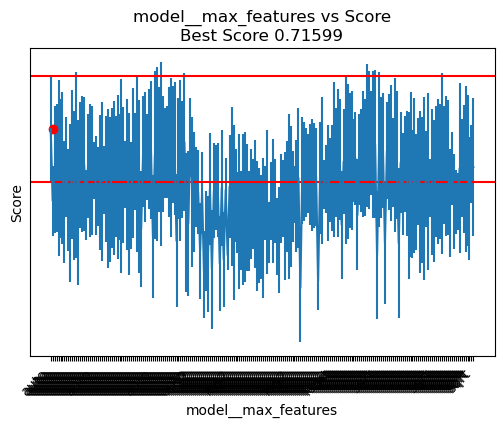

best parameters: {'model__max_depth': None, 'model__max_features': 'auto', 'model__min_samples_leaf': 1, 'model__n_estimators': 250}
best score:      0.71599 (+/-0.00787)


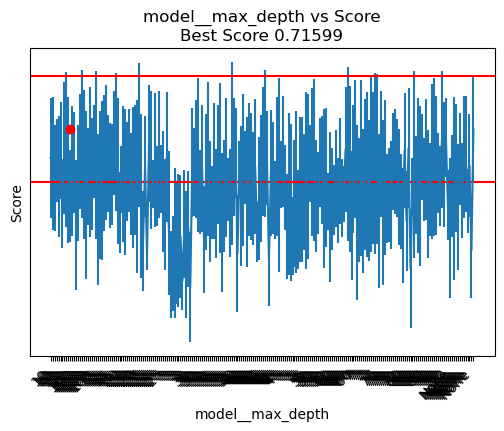

In [118]:
# gridsearch to look at max depth and max features, keeping n_estimators at 100 and min_samples_leaf at 1

param_grid = {'model__n_estimators' : [100, 250, 500, 1000],
                    'model__max_depth' : [None,  3,  5,  7, 10, 15, 20, 25, 30, 35, 40, 45, 50, 60, 70, 80, 90, 100],
                    'model__max_features' : ['auto', 'sqrt', 'log2'],
                    'model__min_samples_leaf' : [1]}

# Initialize the GridSearchCV object with the model (rf_model), parameter grid, and cross-validation strategy
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=4, scoring='accuracy', n_jobs = 16, verbose=0)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Use the GridSearch_table_plot function to visualize the results

gs_max_features_results, gs_mf_fig  = GridSearch_results(grid_search, param_name='model__max_features', 
                                                            num_results=0, graph=True, display_all_params=False)

gs_max_depth_results, gs_md_fig = GridSearch_results(grid_search, param_name='model__max_depth', 
                                                        num_results=0, graph=True, display_all_params=False)

play_jobs_done()

results_df = pd.DataFrame(grid_search.cv_results_)

In [119]:
results_df.sort_values(by='rank_test_score').head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__max_depth,param_model__max_features,param_model__min_samples_leaf,param_model__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
1,9.084007,0.116754,0.131500,0.022143,NaN,auto,1,250,"{'model__max_depth': None, 'model__max_feature...",0.706986,0.724450,0.723157,0.709385,0.715994,0.007868,1
79,33.195091,0.265805,0.349573,0.030509,20.0,sqrt,1,1000,"{'model__max_depth': 20, 'model__max_features'...",0.698577,0.728331,0.717982,0.715210,0.715025,0.010681,2
193,10.520610,0.079472,0.211814,0.020352,90.0,auto,1,250,"{'model__max_depth': 90, 'model__max_features'...",0.706339,0.721863,0.717982,0.712621,0.714701,0.005837,3
198,20.630598,0.155602,0.304883,0.008243,90.0,sqrt,1,500,"{'model__max_depth': 90, 'model__max_features'...",0.698577,0.723803,0.723157,0.711974,0.714378,0.010263,4
61,8.675921,0.063491,0.141590,0.012461,15.0,auto,1,250,"{'model__max_depth': 15, 'model__max_features'...",0.702458,0.726391,0.721863,0.705502,0.714053,0.010257,5


In [121]:
pivoted_results = results_df.pivot_table(
    index='param_model__max_features', 
    columns='param_model__n_estimators', 
    values='mean_test_score'
)

In [120]:
# Investigate Max Depth and Max Features
fig = px.box(results_df, x="param_model__max_depth", y="mean_test_score", color = "param_model__max_features")
fig.show()


In [125]:
# boxplot the same as above
fig = px.box(results_df, x="param_model__n_estimators", y="mean_test_score", color = "param_model__max_features")
fig.show()

From this, we can see that "Auto" is almost always the best max_feature, so let's keep it. 
- SQRT also does well, so just dropping log2. 
- As for max depth, it seemed to still be increasing with more depth, so I will add more depth. 
- N_Estimators get generally the same result from 250 on, so for space and time, I will go with 250. 
- Adding in min_samples_leaf options

best parameters: {'model__max_depth': 130, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 2, 'model__n_estimators': 250}
best score:      0.71551 (+/-0.01428)


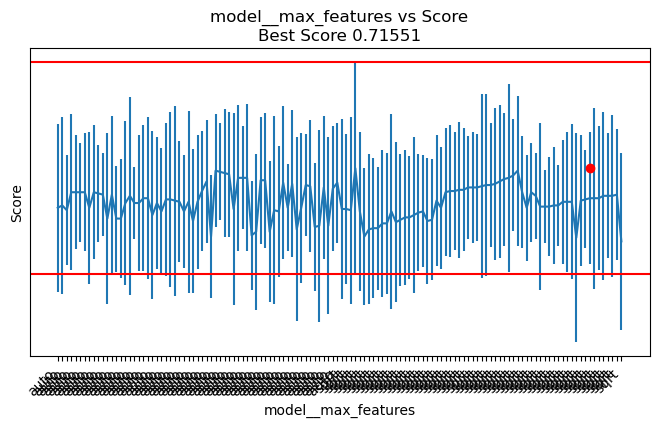

best parameters: {'model__max_depth': 130, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 2, 'model__n_estimators': 250}
best score:      0.71551 (+/-0.01428)


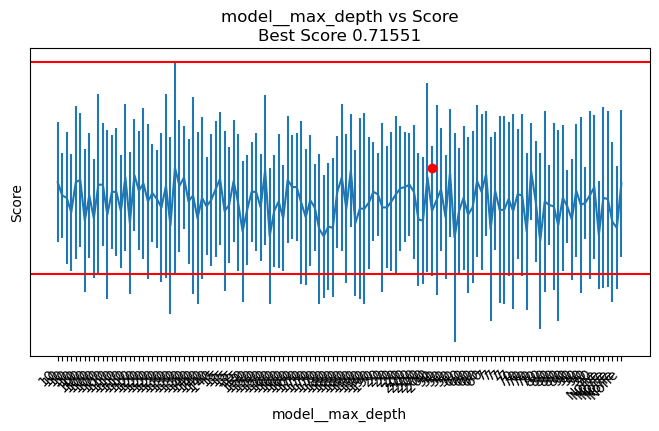

In [133]:
# gridsearch to look at max depth and max features, keeping n_estimators at 100 and min_samples_leaf at 1

param_grid = {'model__n_estimators' : [250],
                    'model__max_depth' : [None,  7, 10, 15, 20, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200],
                    'model__max_features' : ['auto', 'sqrt',],
                    'model__min_samples_leaf' : [1, 2, 3]}

# Initialize the GridSearchCV object with the model (rf_model), parameter grid, and cross-validation strategy
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=4, scoring='accuracy', n_jobs = 16, verbose=0)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Use the GridSearch_table_plot function to visualize the results

gs_max_features_results, gs_mf_fig  = GridSearch_results(grid_search, param_name='model__max_features', 
                                                            num_results=0, graph=True, display_all_params=False)

gs_max_depth_results, gs_md_fig = GridSearch_results(grid_search, param_name='model__max_depth', 
                                                        num_results=0, graph=True, display_all_params=False)

play_jobs_done()

results_df = pd.DataFrame(grid_search.cv_results_)

In [134]:
results_df.sort_values(by='rank_test_score').head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__max_depth,param_model__max_features,param_model__min_samples_leaf,param_model__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
82,8.760884,0.033068,0.141752,0.005584,130.0,sqrt,2,250,"{'model__max_depth': 130, 'model__max_features...",0.697930,0.736740,0.718629,0.708738,0.715509,0.014277,1
95,8.675563,0.075524,0.156751,0.019486,150.0,sqrt,3,250,"{'model__max_depth': 150, 'model__max_features...",0.699224,0.726391,0.720569,0.714563,0.715187,0.010121,2
110,8.484778,0.085180,0.148750,0.013588,180.0,auto,3,250,"{'model__max_depth': 180, 'model__max_features...",0.704398,0.724450,0.719922,0.711974,0.715186,0.007664,3
44,8.297873,0.079764,0.134385,0.011200,70.0,auto,3,250,"{'model__max_depth': 70, 'model__max_features'...",0.707633,0.721216,0.721863,0.709385,0.715024,0.006549,4
31,8.762743,0.092916,0.142128,0.025108,50.0,auto,2,250,"{'model__max_depth': 50, 'model__max_features'...",0.700517,0.722510,0.720569,0.715858,0.714863,0.008629,5


In [135]:
# Investigate Max Depth and Max Features
fig = px.box(results_df, x="param_model__max_depth", y="mean_test_score", color = "param_model__max_features")
fig.show()


In [139]:
# Investigate Max Depth and Max Features
fig = px.box(results_df, x="param_model__max_depth", y="mean_test_score", color = "param_model__min_samples_leaf")
fig.show()

In [142]:
from tqdm.auto import tqdm
from itertools import product

In [143]:
def progress_bar(param_grid):
    keys, values = zip(*param_grid.items())
    for v in tqdm(product(*values), desc='Grid Search Progress'):
        yield dict(zip(keys, v))

In [145]:
def progress_bar(param_grid):
    keys, values = zip(*param_grid.items())
    for v in tqdm(product(*values), desc='Grid Search Progress'):
        yield dict(zip(keys, v))

params = {'model__n_estimators' : [250],
          'model__max_depth' : [None,  7, 10, 15, 20, 24, 28, 32, 36, 40, 44, 50, 55, 60, 65, 70, 75, 80, 90, 100],
          'model__max_features' : ['auto', 'sqrt', .6],
          'model__min_samples_leaf' : [1, 2, 3, 4, 5],
          'model__min_samples_split' : [2, 3, 4, 5],
          'model__bootstrap' :  [True],
          'model__criterion' : ['gini', 'entropy']}

param_grid_iter = list(progress_bar(params))

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid_iter, cv=4, scoring='accuracy', n_jobs=16, verbose=0)

grid_search.fit(X_train, y_train)

gs_max_features_results, gs_mf_fig  = GridSearch_results(grid_search, param_name='model__max_features',
                                                         num_results=0, graph=True, display_all_params=False)

gs_max_depth_results, gs_md_fig = GridSearch_results(grid_search, param_name='model__max_depth',
                                                     num_results=0, graph=True, display_all_params=False)

play_jobs_done()

results_df = pd.DataFrame(grid_search.cv_results_)
results_df.sort_values(by='rank_test_score').head(5)

Grid Search Progress: 0it [00:00, ?it/s]

ValueError: Parameter grid for parameter (model__n_estimators) needs to be a list or numpy array, but got (<class 'int'>). Single values need to be wrapped in a list with one element.

In [ ]:
def random_forest_gridsearch(model, X, y):

    # Define the grid of hyperparameters
    param_grids = [
        {'max_depth': [None] + list(range(2, 101, 5)),
         'max_features': ['auto', 'sqrt'] + [x / 10 for x in range(4, 11)],
         'n_estimators': [250],
         'criterion': ['gini', 'entropy'],
         'min_samples_split': list(range(2, 6)),
         'min_samples_leaf': list(range(1, 6)),
         'max_leaf_nodes': [None] + list(range(2, 5)),
         'min_impurity_decrease': [x / 10 for x in range(3)],
         'ccp_alpha': [x / 25 for x in range(3)]}
    ]

    best_params = {}
     

    # Perform a sequential grid search, updating the best parameters found for each hyperparameter
    for param_name, param_values in param_grids[0].items():
        # Use the list of values for the current hyperparameter
        current_grid = {param_name: param_values}
        # Update the best parameters found so far
        for k, v in best_params.items():
            if k != param_name:
                current_grid[k] = [v]  # Wrap individual values in a list
        current_grid = {'model__' + k: v for k, v in current_grid.items()}

        # Use GridSearchCV with the current hyperparameter grid
        gridsearch = GridSearchCV(model, current_grid, cv=4, scoring='accuracy', n_jobs=16, verbose=2)
        gridsearch.fit(X_train, y_train)
        best_estimator = gridsearch.best_estimator_
        best_param_value = gridsearch.best_params_['model__' + param_name]

        # Update the best parameters dictionary with the best value found for the current hyperparameter
        best_params[param_name] = best_param_value
        print(f'Best {param_name}: {best_param_value}')

    # Run gridsearched_model() on the best_estimator object to save the best model


    return best_estimator, best_params

# run the gridsearch
best_estimator, best_params = random_forest_gridsearch(rf_model, X_train, y_train)

Fitting 4 folds for each of 21 candidates, totalling 84 fits
Best max_depth: 77
Fitting 4 folds for each of 10 candidates, totalling 40 fits


In [ ]:
final_gridsearched_model = gridsearched_model(best_estimator, 'Random_Forest_Gridsearched')

In [ ]:
final_gridsearched_model

,Model,Cv_Mean_Accuracy,Cv_Std
0,Random_Forest_1000,0.724,0.003
0,Random_Forest_Gridsearched,0.723,0.008
0,Random_Forest_Gridsearched,0.722,0.001
0,Random_Forest_Gridsearched_n_estimators,0.722,0.005
0,Random_Forest_Gridsearched,0.720,0.002
0,Random_Forest_500,0.720,0.003
0,Random_Forest,0.716,0.014
0,XGBoost,0.712,0.003
0,Extra_Trees,0.708,0.012
0,Logistic_Regression,0.690,0.001


Original Code

Updated Random Forest Gridsearch #1

In [ ]:
def random_forest_gridsearch(model, X, y):

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define the grid of hyperparameters
    param_grids = [
        {'n_estimators': [100, 500],
         'max_depth': [None] + list(range(2, 101, 5)),
         'max_features': ['auto', 'sqrt', 'log2'] + [x / 10 for x in range(4, 11)],
         'criterion': ['gini', 'entropy'],
         'min_samples_split': list(range(2, 8)),
         'min_samples_leaf': list(range(1, 8)),
         'bootstrap': [True],
         'max_leaf_nodes': [None] + list(range(2, 6)),
         'min_impurity_decrease': [x / 10 for x in range(4)],
         'ccp_alpha': [x / 10 for x in range(6)]}
    ]

    best_params = {}

    # Perform a sequential grid search, updating the best parameters found for each hyperparameter
    for param_name, param_values in param_grids[0].items():
        # Use the list of values for the current hyperparameter
        current_grid = {param_name: param_values}
        # Update the best parameters found so far
        for k, v in best_params.items():
            if k != param_name:
                current_grid[k] = [v]  # Wrap individual values in a list
        current_grid = {'model__' + k: v for k, v in current_grid.items()}

        # Use GridSearchCV with the current hyperparameter grid
        gridsearch = GridSearchCV(model, current_grid, cv=4, scoring='accuracy', n_jobs=-1, verbose=2)
        gridsearch.fit(X_train, y_train)
        best_estimator = gridsearch.best_estimator_
        best_param_value = gridsearch.best_params_['model__' + param_name]

        # Update the best parameters dictionary with the best value found for the current hyperparameter
        best_params[param_name] = best_param_value
        print(f'Best {param_name}: {best_param_value}')

    # Run gridsearched_model() on the best_estimator object to save the best model

    final_gridsearched_model = gridsearched_model(best_estimator, 'Random_Forest_Gridsearched')
    print(final_gridsearched_model)

    return best_estimator, best_params

In [ ]:
# run the gridsearch
best_estimator, best_params = random_forest_gridsearch(rf_model, X_train, y_train)

In [ ]:
best_estimator

NameError: name 'best_estimator' is not defined

In [ ]:
best_params

{'n_estimators': 500,
 'max_depth': 82,
 'max_features': 'sqrt',
 'criterion': 'gini',
 'min_samples_split': 5,
 'min_samples_leaf': 7,
 'bootstrap': True,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'ccp_alpha': 0.0}

In [ ]:
# test the best model on the test set
y_pred = best_estimator.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.725376031052887


In [ ]:
final_gridsearched_model = gridsearched_model(best_estimator, 'Random_Forest_Gridsearched')

NameError: name 'best_estimator' is not defined

In [ ]:


def random_forest_gridsearch(model, X, y):
    """
    Performs a grid search on a Random Forest classifier using the provided hyperparameters.

    Args:
        model (RandomForestClassifier): The Random Forest model used for the grid search
        X (pandas.DataFrame): The features dataset
        y (pandas.DataFrame): The target variable dataset

    Returns:
        best_estimator (RandomForestClassifier): The best Random Forest classifier object
        best_params (dict): A dictionary of the best hyperparameters found for the Random Forest classifier
    """

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define the grid of hyperparameters
    param_grids = [
        {
            'n_estimators': [100, 500],
            'max_depth': [None] + list(range(2, 101, 5)),
            'max_features': ['auto', 'sqrt', 'log2'] + [x / 10 for x in range(4, 11)],
            'criterion': ['gini', 'entropy'],
            'min_samples_split': list(range(2, 8)),
            'min_samples_leaf': list(range(1, 8)),
            'bootstrap': [True],
            'max_leaf_nodes': [None] + list(range(2, 6)),
            'min_impurity_decrease': [x / 10 for x in range(4)],
            'ccp_alpha': [x / 10 for x in range(6)],
        }
    ]

    best_params = {}

    # Perform a sequential grid search, updating the best parameters found for each hyperparameter
    for param_name, param_values in param_grids[0].items():
        # Use the list of values for the current hyperparameter
        current_grid = {param_name: param_values}
        # Update the best parameters found so far
        for k, v in best_params.items():
            if k != param_name:
                current_grid[k] = [v]  # Wrap individual values in a list
        current_grid = {'model__' + k: v for k, v in current_grid.items()}

        # Use GridSearchCV with the current hyperparameter grid
        gridsearch = GridSearchCV(
            model,
            current_grid,
            cv=4, 
            scoring='accuracy',
            n_jobs=-1,
            verbose=2
        )
        gridsearch.fit(X_train, y_train)
        best_estimator = gridsearch.best_estimator_
        best_param_value = gridsearch.best_params_['model__' + param_name]

        # Update the best parameters dictionary with the best value found for the current hyperparameter
        best_params[param_name] = best_param_value
        print(f'Best {param_name}: {best_param_value}')

    # Run gridsearched_model() on the best_estimator object to save the best model
    final_gridsearched_model = gridsearched_model(best_estimator, 'Random_Forest_Gridsearched')
    print(final_gridsearched_model)

    return best_estimator, best_params


In [ ]:
# run the function
best_estimator, best_params = random_forest_gridsearch(rf_model, X_train, y_train)

Fitting 4 folds for each of 3 candidates, totalling 12 fits
Best n_estimators: 1000
Fitting 4 folds for each of 21 candidates, totalling 84 fits


TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.


Randomized Search

In [ ]:
# get the best model from the final_gridsearched_model
model_summary2

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
import pandas as pd

def plot_sensitivity_analysis(gridsearch, param_name, metric='mean_test_score'):
    results = gridsearch.cv_results_
    param_values = results['param_' + param_name]
    metric_values = results[metric]
    
    plt.plot(param_values, metric_values, marker='o', linestyle='--')
    plt.xlabel(param_name)
    plt.ylabel(metric)
    plt.title(f'Sensitivity Analysis: {param_name}')
    plt.grid()
    plt.show()

def random_forest_gridsearch(model, X_train, y_train):
    param_grids = [
        {'n_estimators': [100, 250, 500, 1000],
         'max_depth': [None] + list(range(2, 101, 5)),
         'max_features': ['auto', 'sqrt', 'log2'] + [x / 10 for x in range(4, 11)],
         'criterion': ['gini', 'entropy'],
         'min_samples_split': list(range(2, 11)),
         'min_samples_leaf': list(range(1, 11)),
         'bootstrap': [True],
         'max_leaf_nodes': [None] + list(range(2, 11)),
         'min_impurity_decrease': [x / 10 for x in range(6)],
         'ccp_alpha': [x / 10 for x in range(6)]}
    ]

    best_params = {}

    for param_name, param_values in param_grids[0].items():
        current_grid = {param_name: param_values}
        valid_best_params = {k: [v] if v is not None and not isinstance(v, (list, np.ndarray)) else v 
                             for k, v in best_params.items() if v is not None}
        current_grid.update(valid_best_params)
        current_grid = {'model__' + k: v for k, v in current_grid.items()}
        gridsearch = GridSearchCV(model, current_grid, cv=4, scoring='accuracy', n_jobs=16, verbose=10)
        gridsearch.fit(X_train, y_train)
        best_estimator = gridsearch.best_estimator_
        best_param_value = gridsearch.best_params_['model__' + param_name]
        best_params[param_name] = best_param_value
        print(f'Best {param_name}: {best_param_value}')

        # save gridsearch
        pickle.dump(gridsearch, open(f'models/gridsearches/random_forest_gridsearch_{param_name}.pkl', 'wb'))

    final_gridsearched_model = best_estimator
    print(final_gridsearched_model)
    return best_estimator, best_params, gridsearch


In [ ]:

# Load the random forest model and your training data
random_forest = pickle.load(open('models/random_forest.pkl', 'rb'))

# Run the modified function
best_estimator, best_params, final_gridsearch = random_forest_gridsearch(random_forest, X_train, y_train)



In [ ]:
import matplotlib.pyplot as plt

def plot_sensitivity_analysis(gridsearch_results, param_name, metric='mean_test_score'):
    param_values = gridsearch_results[param_name]
    metric_values = gridsearch_results[metric]
    plt.plot(param_values, metric_values, marker='o', linestyle='--')
    plt.title(f'Sensitivity Analysis: {param_name}')
    plt.xlabel(param_name)
    plt.ylabel(metric)
    plt.show()

# Store the grid search results for each hyperparameter in a dictionary
gridsearch_results_dict = {}

# Perform a sequential grid search, updating the best parameters found for each hyperparameter
for param_name, param_values in param_grids[0].items():
    current_grid = {param_name: param_values}
    valid_best_params = {k: [v] for k, v in best_params.items()}
    current_grid.update(valid_best_params)
    current_grid = {'model__' + k: v for k, v in current_grid.items()}
    gridsearch = GridSearchCV(model, current_grid, cv=4, scoring='accuracy', n_jobs=-1, verbose=10)
    gridsearch.fit(X_train, y_train)
    best_params[param_name] = gridsearch.best_params_['model__' + param_name]
    
    # Store the grid search results in the dictionary
    gridsearch_results_dict[param_name] = {
        'param_' + param_name: gridsearch.cv_results_['param_model__' + param_name],
        'mean_test_score': gridsearch.cv_results_['mean_test_score']
    }

# Perform sensitivity analysis for each hyperparameter using the stored grid search results
for param_name in gridsearch_results_dict.keys():
    plot_sensitivity_analysis(gridsearch_results_dict[param_name], param_name='param_' + param_name, metric='mean_test_score')


In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
import pandas as pd

# Define the grid of hyperparameters
param_grids = {
    'n_estimators': [100, 250],
    'max_depth': [None] + list(range(2, 10, 5)),
    'max_features': ['auto', 'sqrt', 'log2'] + [x / 10 for x in range(4, 7)],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': list(range(2,4)),
    'min_samples_leaf': list(range(1, 4)),
    'bootstrap': [True],
}

def plot_sensitivity_analysis(gridsearch_results, param_name, metric='mean_test_score'):
    param_values = gridsearch_results[param_name]
    metric_values = gridsearch_results[metric]
    plt.plot(param_values, metric_values, marker='o', linestyle='--')
    plt.title(f'Sensitivity Analysis: {param_name}')
    plt.xlabel(param_name)
    plt.ylabel(metric)
    plt.show()

# Store the grid search results for each hyperparameter in a dictionary
gridsearch_results_dict = {}

# Perform a sequential grid search, updating the best parameters found for each hyperparameter
for param_name, param_values in param_grids.items():
    current_grid = {param_name: param_values}
    valid_best_params = {k: [v] for k, v in best_params.items()}
    current_grid.update(valid_best_params)
    current_grid = {'model__' + k: v for k, v in current_grid.items()}
    gridsearch = GridSearchCV(random_forest, current_grid, cv=4, scoring='accuracy', n_jobs=16, verbose=10)
    gridsearch.fit(X_train, y_train)
    best_params[param_name] = gridsearch.best_params_['model__' + param_name]
    
    # Store the grid search results in the dictionary
    gridsearch_results_dict[param_name] = {
        'param_' + param_name: gridsearch.cv_results_['param_model__' + param_name],
        'mean_test_score': gridsearch.cv_results_['mean_test_score']
    }

# Perform sensitivity analysis for each hyperparameter using the stored grid search results
for param_name in gridsearch_results_dict.keys():
    plot_sensitivity_analysis(gridsearch_results_dict[param_name], param_name='param_' + param_name, metric='mean_test_score')


In [ ]:
import matplotlib.pyplot as plt

def plot_sensitivity_analysis(gridsearch, param_name, metric='mean_test_score'):
    """
    Plot sensitivity analysis for a specific hyperparameter from grid search results.

    Parameters:
        gridsearch: Fitted GridSearchCV object
        param_name: The name of the hyperparameter for sensitivity analysis
        metric: Scikit-learn scoring metric used in grid search (e.g., 'mean_test_score')
    """
    # Get the grid search results as a DataFrame
    results_df = pd.DataFrame(gridsearch.cv_results_)
    
    # Extract the values of the hyperparameter and the corresponding test scores
    param_values = results_df[param_name]
    test_scores = results_df[metric]
    
    # Plot the sensitivity analysis
    plt.figure(figsize=(10, 6))
    plt.plot(param_values, test_scores, marker='o')
    plt.xlabel(param_name)
    plt.ylabel(metric)
    plt.title(f'Sensitivity Analysis: {param_name}')
    plt.grid(True)
    plt.show()

# Example usage
# gridsearch: Fitted GridSearchCV object returned by random_forest_gridsearch function
# param_name: Hyperparameter name for analysis (e.g., 'model__max_depth')
# metric: Scikit-learn scoring metric used in grid search (e.g., 'mean_test_score')

# Perform sensitivity analysis for each hyperparameter in best_params
for param_name in best_params.keys():
    plot_sensitivity_analysis(gridsearch, param_name='model__' + param_name, metric='mean_test_score')


### Model 1: XGBoost

In [ ]:
xg_boost = pickle.load(open('models/XGBoost.pkl', 'rb'))
keys = xg_boost.get_params().keys()
model_keys = [key for key in keys if 'model' in key]
xg_boost[1].get_params
stopjere

In [ ]:
def xgboost_gridsearch(model):
        ##### GRID SEARCH 1 -- N ESTIMATORS #####
        n_est_grid = {'model__n_estimators' : [50, 100, 200, 300, 500, 600,  800,  1000],
                                'model__max_depth' : [None],
                                'model__learning_rate' : [0.1],
                                'model__min_child_weight' : [1],
                                'model__gamma' : [0],
                                'model__subsample' : [1],
                                'model__colsample_bytree' : [1],
                                'model__colsample_bylevel' : [1],
                                'model__colsample_bynode' : [1],
                                'model__reg_alpha' : [0],
                                'model__reg_lambda' : [1],
                                'model__scale_pos_weight' : [1],
                                'model__base_score' : [0.5],
                                'model__n_jobs' : [20],
                                'model__tree_method' : ['exact']}


        gridsearch_1 = GridSearchCV(model, n_est_grid, cv = 4, scoring = 'accuracy', n_jobs = 20, verbose = 10)
        gridsearch_1.fit(X_train, y_train)
        gm = gridsearched_model(gridsearch_1.best_estimator_, 'XGBoost_Gridsearched_1')
        bp = gridsearch_1.best_params_
        bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()
        n_est = bp2[bp2['index'] == 'model__n_estimators']
        n_est = n_est[0].values[0]
        print(f'Best n_estimators: {n_est}')

        ##### GRID SEARCH 2 -- MAX DEPTH #####
        max_depth_grid = {'model__n_estimators' : [n_est],
                                'model__max_depth' : [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, None],
                                'model__learning_rate' : [0.1],
                                'model__min_child_weight' : [1],
                                'model__gamma' : [0],
                                'model__subsample' : [1],
                                'model__colsample_bytree' : [1],
                                'model__colsample_bylevel' : [1],
                                'model__colsample_bynode' : [1],
                                'model__reg_alpha' : [0],
                                'model__reg_lambda' : [1],
                                'model__scale_pos_weight' : [1],
                                'model__base_score' : [0.5],
                                'model__n_jobs' : [20],
                                'model__tree_method' : ['exact']}


        gridsearch_2 = GridSearchCV(model, max_depth_grid, cv = 4, scoring = 'accuracy', n_jobs = 20, verbose = 10)
        gridsearch_2.fit(X_train, y_train)
        gm = gridsearched_model(gridsearch_2.best_estimator_, 'XGBoost_Gridsearched_2')
        bp = gridsearch_2.best_params_
        bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()
        max_depth = bp2[bp2['index'] == 'model__max_depth']
        max_depth = max_depth[0].values[0]
        print(f'Best max_depth: {max_depth}')

        ##### GRID SEARCH 3 -- LEARNING RATE #####
        learning_rate_grid = {'model__n_estimators' : [n_est],
                                'model__max_depth' : [max_depth],
                                'model__learning_rate' : [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5],
                                'model__min_child_weight' : [1],
                                'model__gamma' : [0],
                                'model__subsample' : [1],
                                'model__colsample_bytree' : [1],
                                'model__colsample_bylevel' : [1],
                                'model__colsample_bynode' : [1],
                                'model__reg_alpha' : [0],
                                'model__reg_lambda' : [1],
                                'model__scale_pos_weight' : [1],
                                'model__base_score' : [0.5],
                                'model__n_jobs' : [20],
                                'model__tree_method' : ['exact']}

        gridsearch_3 = GridSearchCV(model, learning_rate_grid, cv = 4, scoring = 'accuracy', n_jobs = 20, verbose = 10)
        gridsearch_3.fit(X_train, y_train)
        gm = gridsearched_model(gridsearch_3.best_estimator_, 'XGBoost_Gridsearched_3')
        bp = gridsearch_3.best_params_
        bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()
        learning_rate = bp2[bp2['index'] == 'model__learning_rate']
        learning_rate = learning_rate[0].values[0]
        print(f'Best learning_rate: {learning_rate}')

        ##### GRID SEARCH 4 -- MIN CHILD WEIGHT #####
        min_child_weight_grid = {'model__n_estimators' : [n_est],
                                'model__max_depth' : [max_depth],
                                'model__learning_rate' : [learning_rate],
                                'model__min_child_weight' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                                'model__gamma' : [0],
                                'model__subsample' : [1],
                                'model__colsample_bytree' : [1],
                                'model__colsample_bylevel' : [1],
                                'model__colsample_bynode' : [1],
                                'model__reg_alpha' : [0],
                                'model__reg_lambda' : [1],
                                'model__scale_pos_weight' : [1],
                                'model__base_score' : [0.5],
                                'model__n_jobs' : [20],
                                'model__tree_method' : ['exact']}

        gridsearch_4 = GridSearchCV(model, min_child_weight_grid, cv = 4, scoring = 'accuracy', n_jobs = 20, verbose = 10)
        gridsearch_4.fit(X_train, y_train)
        gm = gridsearched_model(gridsearch_4.best_estimator_, 'XGBoost_Gridsearched_4')
        bp = gridsearch_4.best_params_
        bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()
        min_child_weight = bp2[bp2['index'] == 'model__min_child_weight']
        min_child_weight = min_child_weight[0].values[0]
        print(f'Best min_child_weight: {min_child_weight}')

        ##### GRID SEARCH 5 -- GAMMA #####
        gamma_grid = {'model__n_estimators' : [n_est],
                                'model__max_depth' : [max_depth],
                                'model__learning_rate' : [learning_rate],
                                'model__min_child_weight' : [min_child_weight],
                                'model__gamma' : [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
                                'model__subsample' : [1],
                                'model__colsample_bytree' : [1],
                                'model__colsample_bylevel' : [1],
                                'model__colsample_bynode' : [1],
                                'model__reg_alpha' : [0],
                                'model__reg_lambda' : [1],
                                'model__scale_pos_weight' : [1],
                                'model__base_score' : [0.5],
                                'model__n_jobs' : [20],
                                'model__tree_method' : ['exact']}

        gridsearch_5 = GridSearchCV(model, gamma_grid, cv = 4, scoring = 'accuracy', n_jobs = 20, verbose = 10)
        gridsearch_5.fit(X_train, y_train)
        gm = gridsearched_model(gridsearch_5.best_estimator_, 'XGBoost_Gridsearched_5')
        bp = gridsearch_5.best_params_
        bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()
        gamma = bp2[bp2['index'] == 'model__gamma']
        gamma = gamma[0].values[0]
        print(f'Best gamma: {gamma}')

        ##### GRID SEARCH 6 -- SUBSAMPLE #####
        subsample_grid = {'model__n_estimators' : [n_est],
                                'model__max_depth' : [max_depth],
                                'model__learning_rate' : [learning_rate],
                                'model__min_child_weight' : [min_child_weight],
                                'model__gamma' : [gamma],
                                'model__subsample' : [0.5, 0.6, 0.7, 0.8, 0.9, 1],
                                'model__colsample_bytree' : [1],
                                'model__colsample_bylevel' : [1],
                                'model__colsample_bynode' : [1],
                                'model__reg_alpha' : [0],
                                'model__reg_lambda' : [1],
                                'model__scale_pos_weight' : [1],
                                'model__base_score' : [0.5],
                                'model__n_jobs' : [20],
                                'model__tree_method' : ['exact']}

        gridsearch_6 = GridSearchCV(model, subsample_grid, cv = 4, scoring = 'accuracy', n_jobs = 20, verbose = 10)
        gridsearch_6.fit(X_train, y_train)
        gm = gridsearched_model(gridsearch_6.best_estimator_, 'XGBoost_Gridsearched_6')
        bp = gridsearch_6.best_params_
        bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()
        subsample = bp2[bp2['index'] == 'model__subsample']
        subsample = subsample[0].values[0]
        print(f'Best subsample: {subsample}')

        ##### GRID SEARCH 7 -- COLSAMPLE BYTREE #####
        colsample_bytree_grid = {'model__n_estimators' : [n_est],
                                'model__max_depth' : [max_depth],
                                'model__learning_rate' : [learning_rate],
                                'model__min_child_weight' : [min_child_weight],
                                'model__gamma' : [gamma],
                                'model__subsample' : [subsample],
                                'model__colsample_bytree' : [0.5, 0.6, 0.7, 0.8, 0.9, 1],
                                'model__colsample_bylevel' : [1],
                                'model__colsample_bynode' : [1],
                                'model__reg_alpha' : [0],
                                'model__reg_lambda' : [1],
                                'model__scale_pos_weight' : [1],
                                'model__base_score' : [0.5],
                                'model__n_jobs' : [20],
                                'model__tree_method' : ['exact']}

        gridsearch_7 = GridSearchCV(model, colsample_bytree_grid, cv = 4, scoring = 'accuracy', n_jobs = 20, verbose = 10)
        gridsearch_7.fit(X_train, y_train)
        gm = gridsearched_model(gridsearch_7.best_estimator_, 'XGBoost_Gridsearched_7')
        bp = gridsearch_7.best_params_
        bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()
        colsample_bytree = bp2[bp2['index'] == 'model__colsample_bytree']
        colsample_bytree = colsample_bytree[0].values[0]
        print(f'Best colsample_bytree: {colsample_bytree}')

        ##### GRID SEARCH 8 -- COLSAMPLE BYLEVEL #####
        colsample_bylevel_grid = {'model__n_estimators' : [n_est],
                                'model__max_depth' : [max_depth],
                                'model__learning_rate' : [learning_rate],
                                'model__min_child_weight' : [min_child_weight],
                                'model__gamma' : [gamma],
                                'model__subsample' : [subsample],
                                'model__colsample_bytree' : [colsample_bytree],
                                'model__colsample_bylevel' : [0.5, 0.6, 0.7, 0.8, 0.9, 1],
                                'model__colsample_bynode' : [1],
                                'model__reg_alpha' : [0],
                                'model__reg_lambda' : [1],
                                'model__scale_pos_weight' : [1],
                                'model__base_score' : [0.5],
                                'model__n_jobs' : [20],
                                'model__tree_method' : ['exact']}

        gridsearch_8 = GridSearchCV(model, colsample_bylevel_grid, cv = 4, scoring = 'accuracy', n_jobs = 20, verbose = 10)
        gridsearch_8.fit(X_train, y_train)
        gm = gridsearched_model(gridsearch_8.best_estimator_, 'XGBoost_Gridsearched_8')
        bp = gridsearch_8.best_params_
        bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()
        colsample_bylevel = bp2[bp2['index'] == 'model__colsample_bylevel']
        colsample_bylevel = colsample_bylevel[0].values[0]

        print(f'Best colsample_bylevel: {colsample_bylevel}')

        ##### GRID SEARCH 9 -- COLSAMPLE BYNODE #####
        colsample_bynode_grid = {'model__n_estimators' : [n_est],
                                'model__max_depth' : [max_depth],
                                'model__learning_rate' : [learning_rate],
                                'model__min_child_weight' : [min_child_weight],
                                'model__gamma' : [gamma],
                                'model__subsample' : [subsample],
                                'model__colsample_bytree' : [colsample_bytree],
                                'model__colsample_bylevel' : [colsample_bylevel],
                                'model__colsample_bynode' : [0.5, 0.6, 0.7, 0.8, 0.9, 1],
                                'model__reg_alpha' : [0],
                                'model__reg_lambda' : [1],
                                'model__scale_pos_weight' : [1],
                                'model__base_score' : [0.5],
                                'model__n_jobs' : [20],
                                'model__tree_method' : ['exact']}

        gridsearch_9 = GridSearchCV(model, colsample_bynode_grid, cv = 4, scoring = 'accuracy', n_jobs = 20, verbose = 10)
        gridsearch_9.fit(X_train, y_train)
        gm = gridsearched_model(gridsearch_9.best_estimator_, 'XGBoost_Gridsearched_9')
        bp = gridsearch_9.best_params_
        bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()
        colsample_bynode = bp2[bp2['index'] == 'model__colsample_bynode']
        colsample_bynode = colsample_bynode[0].values[0]
        print(f'Best colsample_bynode: {colsample_bynode}')

        ##### GRID SEARCH 10 -- REG ALPHA #####
        reg_alpha_grid = {'model__n_estimators' : [n_est],
                                'model__max_depth' : [max_depth],
                                'model__learning_rate' : [learning_rate],
                                'model__min_child_weight' : [min_child_weight],
                                'model__gamma' : [gamma],
                                'model__subsample' : [subsample],
                                'model__colsample_bytree' : [colsample_bytree],
                                'model__colsample_bylevel' : [colsample_bylevel],
                                'model__colsample_bynode' : [colsample_bynode],
                                'model__reg_alpha' : [0, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1],
                                'model__reg_lambda' : [1],
                                'model__scale_pos_weight' : [1],
                                'model__base_score' : [0.5],
                                'model__n_jobs' : [20],
                                'model__tree_method' : ['exact']}

        gridsearch_10 = GridSearchCV(model, reg_alpha_grid, cv = 4, scoring = 'accuracy', n_jobs = 20, verbose = 10)
        gridsearch_10.fit(X_train, y_train)
        gm = gridsearched_model(gridsearch_10.best_estimator_, 'XGBoost_Gridsearched_10')
        bp = gridsearch_10.best_params_
        bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()
        reg_alpha = bp2[bp2['index'] == 'model__reg_alpha']
        reg_alpha = reg_alpha[0].values[0]
        print(f'Best reg_alpha: {reg_alpha}')

        ##### GRID SEARCH 11 -- REG LAMBDA #####
        reg_lambda_grid = {'model__n_estimators' : [n_est],
                                'model__max_depth' : [max_depth],
                                'model__learning_rate' : [learning_rate],
                                'model__min_child_weight' : [min_child_weight],
                                'model__gamma' : [gamma],
                                'model__subsample' : [subsample],
                                'model__colsample_bytree' : [colsample_bytree],
                                'model__colsample_bylevel' : [colsample_bylevel],
                                'model__colsample_bynode' : [colsample_bynode],
                                'model__reg_alpha' : [reg_alpha],
                                'model__reg_lambda' : [0, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1],
                                'model__scale_pos_weight' : [1],
                                'model__base_score' : [0.5],
                                'model__n_jobs' : [20],
                                'model__tree_method' : ['exact']}
                                

        gridsearch_11 = GridSearchCV(model, reg_lambda_grid, cv = 4, scoring = 'accuracy', n_jobs = 20, verbose = 10)
        gridsearch_11.fit(X_train, y_train)
        gm = gridsearched_model(gridsearch_11.best_estimator_, 'XGBoost_Gridsearched_11')
        bp = gridsearch_11.best_params_
        bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()

        reg_lambda = bp2[bp2['index'] == 'model__reg_lambda']
        reg_lambda = reg_lambda[0].values[0]
        print(f'Best reg_lambda: {reg_lambda}')

        ##### GRID SEARCH 12 -- SCALE POS WEIGHT #####
        scale_pos_weight_grid = {'model__n_estimators' : [n_est],
                                'model__max_depth' : [max_depth],
                                'model__learning_rate' : [learning_rate],
                                'model__min_child_weight' : [min_child_weight],
                                'model__gamma' : [gamma],
                                'model__subsample' : [subsample],
                                'model__colsample_bytree' : [colsample_bytree],
                                'model__colsample_bylevel' : [colsample_bylevel],
                                'model__colsample_bynode' : [colsample_bynode],
                                'model__reg_alpha' : [reg_alpha],
                                'model__reg_lambda' : [reg_lambda],
                                'model__scale_pos_weight' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                                'model__base_score' : [0.5],
                                'model__n_jobs' : [20],
                                'model__tree_method' : ['exact']}

        gridsearch_12 = GridSearchCV(model, scale_pos_weight_grid, cv = 4, scoring = 'accuracy', n_jobs = 20, verbose = 10)
        gridsearch_12.fit(X_train, y_train)
        gm = gridsearched_model(gridsearch_12.best_estimator_, 'XGBoost_Gridsearched_12')
        bp = gridsearch_12.best_params_
        bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()

        scale_pos_weight = bp2[bp2['index'] == 'model__scale_pos_weight']
        scale_pos_weight = scale_pos_weight[0].values[0]

        print(f'Best scale_pos_weight: {scale_pos_weight}')

        ##### GRID SEARCH 13 -- BASE SCORE #####
        base_score_grid = {'model__n_estimators' : [n_est],
                                'model__max_depth' : [max_depth],
                                'model__learning_rate' : [learning_rate],
                                'model__min_child_weight' : [min_child_weight],
                                'model__gamma' : [gamma],
                                'model__subsample' : [subsample],
                                'model__colsample_bytree' : [colsample_bytree],
                                'model__colsample_bylevel' : [colsample_bylevel],
                                'model__colsample_bynode' : [colsample_bynode],
                                'model__reg_alpha' : [reg_alpha],
                                'model__reg_lambda' : [reg_lambda],
                                'model__scale_pos_weight' : [scale_pos_weight],
                                'model__base_score' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
                                'model__n_jobs' : [20],
                                'model__tree_method' : ['exact']}

        gridsearch_13 = GridSearchCV(model, base_score_grid, cv = 4, scoring = 'accuracy', n_jobs = 20, verbose = 10)
        gridsearch_13.fit(X_train, y_train)
        gm = gridsearched_model(gridsearch_13.best_estimator_, 'XGBoost_Gridsearched_13')
        bp = gridsearch_13.best_params_
        bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()

        base_score = bp2[bp2['index'] == 'model__base_score']
        base_score = base_score[0].values[0]

        print(f'Best base_score: {base_score}')

        ##### GRID SEARCH 14 -- MAX DELTA STEP #####
        max_delta_step_grid = {'model__n_estimators' : [n_est],
                                'model__max_depth' : [max_depth],
                                'model__learning_rate' : [learning_rate],
                                'model__min_child_weight' : [min_child_weight],
                                'model__gamma' : [gamma],
                                'model__subsample' : [subsample],
                                'model__colsample_bytree' : [colsample_bytree],
                                'model__colsample_bylevel' : [colsample_bylevel],
                                'model__colsample_bynode' : [colsample_bynode],
                                'model__reg_alpha' : [reg_alpha],
                                'model__reg_lambda' : [reg_lambda],
                                'model__scale_pos_weight' : [scale_pos_weight],
                                'model__base_score' : [base_score],
                                'model__n_jobs' : [20],
                                'model__tree_method' : ['exact']}

        gridsearch_14 = GridSearchCV(model, max_delta_step_grid, cv = 4, scoring = 'accuracy', n_jobs = 20, verbose = 10)
        gridsearch_14.fit(X_train, y_train)
        gm = gridsearched_model(gridsearch_14.best_estimator_, 'XGBoost_Gridsearched_14')

        ## RETURN

        return gm, gridsearch_1.best_params_, gridsearch_2.best_params_, gridsearch_3.best_params_, gridsearch_4.best_params_, gridsearch_5.best_params_, gridsearch_6.best_params_, gridsearch_7.best_params_, gridsearch_8.best_params_, gridsearch_9.best_params_, gridsearch_10.best_params_, gridsearch_11.best_params_, gridsearch_12.best_params_, gridsearch_13.best_params_, gridsearch_14.best_params_




In [ ]:
# THIS is the version GPT4 came up with:

def xgboost_gridsearch(model, X_train, y_train, cv=4, n_jobs=20, verbose=10):
    """
    Perform grid search for hyperparameter tuning of the XGBoost model.
    
    Parameters:
        model: XGBoost model to be tuned
        X_train: Training features
        y_train: Training labels
        cv: Number of cross-validation folds
        n_jobs: Number of jobs to run in parallel
        verbose: Controls the verbosity of the output
    
    Returns:
        gm: Best grid search model
        best_params_list: List of best parameters for each grid search
    """
    
    # Define parameter grids for each grid search
    param_grids = [
        {'model__n_estimators': [100, 300, 500, 750, 1000]},
        {'model__max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, None]},
        {'model__learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]},
        {'model__min_child_weight': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
        {'model__gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]},
        {'model__subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1]},
        {'model__colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1]},
        {'model__colsample_bylevel': [0.5, 0.6, 0.7, 0.8, 0.9, 1]},
        {'model__colsample_bynode': [0.5, 0.6, 0.7, 0.8, 0.9, 1]},
        {'model__reg_alpha': [0, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]},
        {'model__reg_lambda': [0, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]},
        {'model__scale_pos_weight': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
        {'model__base_score': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
    ]
    
    best_params_list = []
    for idx, param_grid in enumerate(param_grids):
        # Update the python parameter grid with the best parameters from previous grid searches
        for params in best_params_list:
            param_grid.update(params)
    
        # Perform grid search
        gridsearch = GridSearchCV(model, param_grid, cv=cv, scoring='accuracy', n_jobs=n_jobs, verbose=verbose)
        gridsearch.fit(X_train, y_train)
        
        # Get the best parameters from the current grid search
        best_params = gridsearch.best_params_
        
        # Add the best parameters to the list
        best_params_list.append(best_params)
        
        # Print the best parameter for the current grid search
        param_name = list(param_grid.keys())[0]
        print(f'Best {param_name}: {best_params[param_name]}')
    
    # Get the best model from the final grid search
    gm = gridsearch.best_estimator_

    return gm, best_params_list

In [ ]:
xgboost_gridsearch(xg_boost)

### Extra Trees

In [ ]:
extra_trees = pickle.load(open('models/Extra_Trees.pkl', 'rb'))

In [ ]:
keys = extra_trees.get_params().keys()
model_keys = [key for key in keys if 'model' in key]
model_keys

In [ ]:
def extra_trees_gridsearch(model):
        """
        Gridsearches the Extra Trees model
        """
        # GRID SEARCH 1 -- N ESTIMATORS
        n_estimators_grid = {'model__n_estimators' : [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
                             'model__criterion' : ['gini'],
                             'model__max_depth' : [None,],
                             'model__min_samples_split' : [2 ],
                             'model__min_samples_leaf' : [1, ],
                             'model__min_weight_fraction_leaf' : [0.0],
                             'model__max_features' : ['auto'],
                             'model__max_leaf_nodes' : [None],
                             'model__min_impurity_decrease' : [0.0],
                             'model__bootstrap' : [False],
                             'model__oob_score' : [False],
                             'model__n_jobs' : [20],
                             'model__ccp_alpha' : [0.0]}

        gridsearch_1 = GridSearchCV(model, n_estimators_grid, cv = 4, scoring = 'accuracy',  verbose = 10)
        gridsearch_1.fit(X_train, y_train)
        gm = gridsearched_model(gridsearch_1.best_estimator_, 'Extra_Trees_Gridsearched_1')
        bp = gridsearch_1.best_params_
        bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()

        n_est = bp2[bp2['index'] == 'model__n_estimators']
        n_est = n_est[0].values[0]

        print(f'Best n_estimators: {n_est}')

        # GRID SEARCH 2 -- CRITERION
        criterion_grid = {'model__n_estimators' : [n_est],
                            'model__criterion' : ['gini', 'entropy'],
                            'model__max_depth' : [None],
                            'model__min_samples_split' : [2 ],
                            'model__min_samples_leaf' : [1 ],
                            'model__min_weight_fraction_leaf' : [0.0],
                            'model__max_features' : ['auto'],
                            'model__max_leaf_nodes' : [None],
                            'model__min_impurity_decrease' : [0.0],
                            'model__bootstrap' : [False],
                            'model__oob_score' : [False],
                            'model__n_jobs' : [20],
                            'model__ccp_alpha' : [0.0]}
        gridsearch_2 = GridSearchCV(model, criterion_grid, cv = 4, scoring = 'accuracy',  verbose = 10)
        gridsearch_2.fit(X_train, y_train)
        gm = gridsearched_model(gridsearch_2.best_estimator_, 'Extra_Trees_Gridsearched_2')
        bp = gridsearch_2.best_params_
        bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()

        criterion = bp2[bp2['index'] == 'model__criterion']
        criterion = criterion[0].values[0]

        print(f'Best criterion: {criterion}')

        # GRID SEARCH 3 -- MAX DEPTH
        max_depth_grid = {'model__n_estimators' : [n_est],
                            'model__criterion' : [criterion],
                            'model__max_depth' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 150],
                            'model__min_samples_split' : [2 ],
                            'model__min_samples_leaf' : [1 ],
                            'model__min_weight_fraction_leaf' : [0.0],
                            'model__max_features' : ['auto'],
                            'model__max_leaf_nodes' : [None],
                            'model__min_impurity_decrease' : [0.0],
                            'model__bootstrap' : [False],
                            'model__oob_score' : [False],
                            'model__n_jobs' : [20],
                            'model__ccp_alpha' : [0.0]}
        gridsearch_3 = GridSearchCV(model, max_depth_grid, cv = 4, scoring = 'accuracy',  verbose = 10)
        gridsearch_3.fit(X_train, y_train)
        gm = gridsearched_model(gridsearch_3.best_estimator_, 'Extra_Trees_Gridsearched_3')
        bp = gridsearch_3.best_params_
        bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()

        max_depth = bp2[bp2['index'] == 'model__max_depth']
        max_depth = max_depth[0].values[0]

        print(f'Best max_depth: {max_depth}')

        # GRID SEARCH 4 -- MIN SAMPLES SPLIT
        min_samples_split_grid = {'model__n_estimators' : [n_est],
                            'model__criterion' : [criterion],
                            'model__max_depth' : [max_depth],
                            'model__min_samples_split' : [2,3,4,5,6,7,8,9,10],
                            'model__min_samples_leaf' : [1 ],
                            'model__min_weight_fraction_leaf' : [0.0],
                            'model__max_features' : ['auto'],
                            'model__max_leaf_nodes' : [None],
                            'model__min_impurity_decrease' : [0.0],
                            'model__bootstrap' : [False],
                            'model__oob_score' : [False],
                            'model__n_jobs' : [20],
                            'model__ccp_alpha' : [0.0]}
        gridsearch_4 = GridSearchCV(model, min_samples_split_grid, cv = 4, scoring = 'accuracy',  verbose = 10)
        gridsearch_4.fit(X_train, y_train)
        gm = gridsearched_model(gridsearch_4.best_estimator_, 'Extra_Trees_Gridsearched_4')
        bp = gridsearch_4.best_params_
        bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()

        min_samples_split = bp2[bp2['index'] == 'model__min_samples_split']
        min_samples_split = min_samples_split[0].values[0]

        print(f'Best min_samples_split: {min_samples_split}')

        # GRID SEARCH 5 -- MIN SAMPLES LEAF
        min_samples_leaf_grid = {'model__n_estimators' : [n_est],
                            'model__criterion' : [criterion],
                            'model__max_depth' : [max_depth],
                            'model__min_samples_split' : [min_samples_split],
                            'model__min_samples_leaf' : [1,2,3,4,5,6,7,8,9,10],
                            'model__min_weight_fraction_leaf' : [0.0],
                            'model__max_features' : ['auto'],
                            'model__max_leaf_nodes' : [None],
                            'model__min_impurity_decrease' : [0.0],
                            'model__bootstrap' : [False],
                            'model__oob_score' : [False],
                            'model__n_jobs' : [20],
                            'model__ccp_alpha' : [0.0]}

        gridsearch_5 = GridSearchCV(model, min_samples_leaf_grid, cv = 4, scoring = 'accuracy',  verbose = 10)
        gridsearch_5.fit(X_train, y_train)
        gm = gridsearched_model(gridsearch_5.best_estimator_, 'Extra_Trees_Gridsearched_5')
        bp = gridsearch_5.best_params_
        bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()

        min_samples_leaf = bp2[bp2['index'] == 'model__min_samples_leaf']
        min_samples_leaf = min_samples_leaf[0].values[0]

        print(f'Best min_samples_leaf: {min_samples_leaf}')

        # GRID SEARCH 6 -- MIN WEIGHT FRACTION LEAF
        min_weight_fraction_leaf_grid = {'model__n_estimators' : [n_est],
                            'model__criterion' : [criterion],
                            'model__max_depth' : [max_depth],
                            'model__min_samples_split' : [min_samples_split],
                            'model__min_samples_leaf' : [min_samples_leaf],
                            'model__min_weight_fraction_leaf' : [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
                            'model__max_features' : ['auto'],
                            'model__max_leaf_nodes' : [None],
                            'model__min_impurity_decrease' : [0.0],
                            'model__bootstrap' : [False],
                            'model__oob_score' : [False],
                            'model__n_jobs' : [20],
                            'model__ccp_alpha' : [0.0]}

        gridsearch_6 = GridSearchCV(model, min_weight_fraction_leaf_grid, cv = 4, scoring = 'accuracy',  verbose = 10)
        gridsearch_6.fit(X_train, y_train)
        gm = gridsearched_model(gridsearch_6.best_estimator_, 'Extra_Trees_Gridsearched_6')
        bp = gridsearch_6.best_params_
        bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()

        min_weight_fraction_leaf = bp2[bp2['index'] == 'model__min_weight_fraction_leaf']
        min_weight_fraction_leaf = min_weight_fraction_leaf[0].values[0]

        print(f'Best min_weight_fraction_leaf: {min_weight_fraction_leaf}')

        # GRID SEARCH 7 -- MAX FEATURES
        max_features_grid = {'model__n_estimators' : [n_est],
                            'model__criterion' : [criterion],
                            'model__max_depth' : [max_depth],
                            'model__min_samples_split' : [min_samples_split],
                            'model__min_samples_leaf' : [min_samples_leaf],
                            'model__min_weight_fraction_leaf' : [min_weight_fraction_leaf],
                            'model__max_features' : ['auto', 'sqrt', 'log2'],
                            'model__max_leaf_nodes' : [None],
                            'model__min_impurity_decrease' : [0.0],
                            'model__bootstrap' : [False],
                            'model__oob_score' : [False],
                            'model__n_jobs' : [20],
                            'model__ccp_alpha' : [0.0]}
        gridsearch_7 = GridSearchCV(model, max_features_grid, cv = 4, scoring = 'accuracy',  verbose = 10)
        gridsearch_7.fit(X_train, y_train)
        gm = gridsearched_model(gridsearch_7.best_estimator_, 'Extra_Trees_Gridsearched_7')
        bp = gridsearch_7.best_params_
        bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()

        max_features = bp2[bp2['index'] == 'model__max_features']
        max_features = max_features[0].values[0]

        print(f'Best max_features: {max_features}')

        # GRID SEARCH 8 -- MAX LEAF NODES
        max_leaf_nodes_grid = {'model__n_estimators' : [n_est],
                            'model__criterion' : [criterion],
                            'model__max_depth' : [max_depth],
                            'model__min_samples_split' : [min_samples_split],
                            'model__min_samples_leaf' : [min_samples_leaf],
                            'model__min_weight_fraction_leaf' : [min_weight_fraction_leaf],
                            'model__max_features' : [max_features],
                            'model__max_leaf_nodes' : [None, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
                            'model__min_impurity_decrease' : [0.0],
                            'model__bootstrap' : [False],
                            'model__oob_score' : [False],
                            'model__n_jobs' : [20],
                            'model__ccp_alpha' : [0.0]}
        gridsearch_8 = GridSearchCV(model, max_leaf_nodes_grid, cv = 4, scoring = 'accuracy',  verbose = 10)
        gridsearch_8.fit(X_train, y_train)
        gm = gridsearched_model(gridsearch_8.best_estimator_, 'Extra_Trees_Gridsearched_8')
        bp = gridsearch_8.best_params_
        bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()

        max_leaf_nodes = bp2[bp2['index'] == 'model__max_leaf_nodes']
        max_leaf_nodes = max_leaf_nodes[0].values[0]

        print(f'Best max_leaf_nodes: {max_leaf_nodes}')

        # GRID SEARCH 9 -- MIN IMPURITY DECREASE
        min_impurity_decrease_grid = {'model__n_estimators' : [n_est],
                            'model__criterion' : [criterion],
                            'model__max_depth' : [max_depth],
                            'model__min_samples_split' : [min_samples_split],
                            'model__min_samples_leaf' : [min_samples_leaf],
                            'model__min_weight_fraction_leaf' : [min_weight_fraction_leaf],
                            'model__max_features' : [max_features],
                            'model__max_leaf_nodes' : [max_leaf_nodes],
                            'model__min_impurity_decrease' : [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
                            'model__bootstrap' : [False],
                            'model__oob_score' : [False],
                            'model__n_jobs' : [20],
                            'model__ccp_alpha' : [0.0]}

        gridsearch_9 = GridSearchCV(model, min_impurity_decrease_grid, cv = 4, scoring = 'accuracy',  verbose = 10)
        gridsearch_9.fit(X_train, y_train)
        gm = gridsearched_model(gridsearch_9.best_estimator_, 'Extra_Trees_Gridsearched_9')
        bp = gridsearch_9.best_params_
        bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()

        min_impurity_decrease = bp2[bp2['index'] == 'model__min_impurity_decrease']
        min_impurity_decrease = min_impurity_decrease[0].values[0]

        print(f'Best min_impurity_decrease: {min_impurity_decrease}')

        # GRID SEARCH 10 -- BOOTSTRAP
        bootstrap_grid = {'model__n_estimators' : [n_est],
                            'model__criterion' : [criterion],
                            'model__max_depth' : [max_depth],
                            'model__min_samples_split' : [min_samples_split],
                            'model__min_samples_leaf' : [min_samples_leaf],
                            'model__min_weight_fraction_leaf' : [min_weight_fraction_leaf],
                            'model__max_features' : [max_features],
                            'model__max_leaf_nodes' : [max_leaf_nodes],
                            'model__min_impurity_decrease' : [min_impurity_decrease],
                            'model__bootstrap' : [False, True],
                            'model__oob_score' : [False],
                            'model__n_jobs' : [20],
                            'model__ccp_alpha' : [0.0]}
        gridsearch_10 = GridSearchCV(model, bootstrap_grid, cv = 4, scoring = 'accuracy',  verbose = 10)
        gridsearch_10.fit(X_train, y_train)
        gm = gridsearched_model(gridsearch_10.best_estimator_, 'Extra_Trees_Gridsearched_10')
        bp = gridsearch_10.best_params_
        bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()

        bootstrap = bp2[bp2['index'] == 'model__bootstrap']
        bootstrap = bootstrap[0].values[0]

        print(f'Best bootstrap: {bootstrap}')

        # GRID SEARCH 11 -- OOB SCORE
        oob_score_grid = {'model__n_estimators' : [n_est],
                            'model__criterion' : [criterion],
                            'model__max_depth' : [max_depth],
                            'model__min_samples_split' : [min_samples_split],
                            'model__min_samples_leaf' : [min_samples_leaf],
                            'model__min_weight_fraction_leaf' : [min_weight_fraction_leaf],
                            'model__max_features' : [max_features],
                            'model__max_leaf_nodes' : [max_leaf_nodes],
                            'model__min_impurity_decrease' : [min_impurity_decrease],
                            'model__bootstrap' : [bootstrap],
                            'model__oob_score' : [False, True],
                            'model__n_jobs' : [20],
                            'model__ccp_alpha' : [0.0]}
        gridsearch_11 = GridSearchCV(model, oob_score_grid, cv = 4, scoring = 'accuracy',  verbose = 10)
        gridsearch_11.fit(X_train, y_train)
        gm = gridsearched_model(gridsearch_11.best_estimator_, 'Extra_Trees_Gridsearched_11')
        bp = gridsearch_11.best_params_
        bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()

        oob_score = bp2[bp2['index'] == 'model__oob_score']
        oob_score = oob_score[0].values[0]

        print(f'Best oob_score: {oob_score}')

        # GRID SEARCH 12 -- CCP ALPHA
        ccp_alpha_grid = {'model__n_estimators' : [n_est],
                            'model__criterion' : [criterion],
                            'model__max_depth' : [max_depth],
                            'model__min_samples_split' : [min_samples_split],
                            'model__min_samples_leaf' : [min_samples_leaf],
                            'model__min_weight_fraction_leaf' : [min_weight_fraction_leaf],
                            'model__max_features' : [max_features],
                            'model__max_leaf_nodes' : [max_leaf_nodes],
                            'model__min_impurity_decrease' : [min_impurity_decrease],
                            'model__bootstrap' : [bootstrap],
                            'model__oob_score' : [oob_score],
                            'model__n_jobs' : [20],
                            'model__ccp_alpha' : [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]}
        gridsearch_12 = GridSearchCV(model, ccp_alpha_grid, cv = 4, scoring = 'accuracy',  verbose = 10)
        gridsearch_12.fit(X_train, y_train)
        gm = gridsearched_model(gridsearch_12.best_estimator_, 'Extra_Trees_Gridsearched_12')
        bp = gridsearch_12.best_params_
        bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()

        ccp_alpha = bp2[bp2['index'] == 'model__ccp_alpha']
        ccp_alpha = ccp_alpha[0].values[0]

        print(f'Best ccp_alpha: {ccp_alpha}')

        return gm, gridsearch_1.best_params_, gridsearch_2.best_params_, gridsearch_3.best_params_, gridsearch_4.best_params_, gridsearch_5.best_params_, gridsearch_6.best_params_, gridsearch_7.best_params_, gridsearch_8.best_params_, gridsearch_9.best_params_, gridsearch_10.best_params_, gridsearch_11.best_params_, gridsearch_12.best_params_

In [ ]:
extra_trees_gridsearch(extra_trees)

In [ ]:
# load svc pickle
svc = pickle.load(open('models/svc.pkl', 'rb'))


In [ ]:
svc['model'].get_params()

#### Best Model


In [ ]:
best_model = pickle.load(open('models/Random_Forest_Gridsearched_3.pkl', 'rb'))

In [ ]:
best_model['model'].get_params()

In [ ]:
cat_list= list(feature_names_categorical)

In [ ]:
all_cats = cat_list + numerical_columns

In [ ]:
f_imp = best_model.steps[1][1].feature_importances_
f_imp_df = pd.DataFrame(f_imp, index = all_cats, columns = ['Importance'])
f_imp_df = f_imp_df.sort_values('Importance', ascending = False)
f_imp_df = f_imp_df.round(3)
f_imp_df

In [ ]:
f_imp_df[:50]

In [ ]:
f_imp_df[50:100]

### One more attempt to improve the model

In [ ]:
best_model = pickle.load(open('models/Random_Forest_Gridsearched_3.pkl', 'rb'))

In [ ]:
best_model['model'].get_params()

In [ ]:
grid = {'model__n_estimators' : [750, 1000, 1500],
        'model__criterion' : ['gini'],
        'model__max_depth' : [15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 120, 150, 200],
        'model__min_samples_split' : [2],
        'model__min_samples_leaf' : [1],
        'model__min_weight_fraction_leaf' : [0.0],
        'model__max_features' : ['sqrt', .6],
        'model__n_jobs' : [-1],
        'model__bootstrap' : [True]}

gridsearch = GridSearchCV(best_model, grid, cv = 3, scoring = 'accuracy',  verbose = 10)
gridsearch.fit(X_train, y_train)

gridsearched_model(gridsearch.best_estimator_, 'Random_Forest_Grid_Post_1')